# Симплектический метод Рунге-Кутты. Осциллятор Якоби
## Загрузка пакета и выбор поля

In [3]:
RR=RealField(300)
load("fdm.sage")

## Начальная задача

In [4]:
var("p,q,r,t")
k=1/2
pr=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)

In [5]:
pr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} p = q r , \quad \frac{d}{dt} q = -p r , \quad  \frac{d}{dt} r = -\frac{1}{4} \, p q , \\ &
p (0)= 0 , \quad q (0)= 1 , \quad r (0)= 1
\end{aligned} \right. 


$$\left \{ \begin{aligned} &
\frac{d}{dt} p = q r , \quad \frac{d}{dt} q = -p r , \quad  \frac{d}{dt} r = -\frac{1}{4} \, p q , \\ &
p (0)= 0 , \quad q (0)= 1 , \quad r (0)= 1
\end{aligned} \right. $$

## Выбор таблицы Бутчера
Первый аргумент -- порядок, второй -- число стадий.

In [6]:
B=butcher_list(4,2,symplectic=True)
len(B)

2

In [86]:
B[0].latex(field=AA)

\begin{array}{c|cc}
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}


$$\begin{array}{c|cc}
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}$$

In [87]:
B[1].latex(field=AA)

\begin{array}{c|cc}
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}


$$\begin{array}{c|cc}
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}$$

## Численное решение
Симплектический метод с постоянным шагом

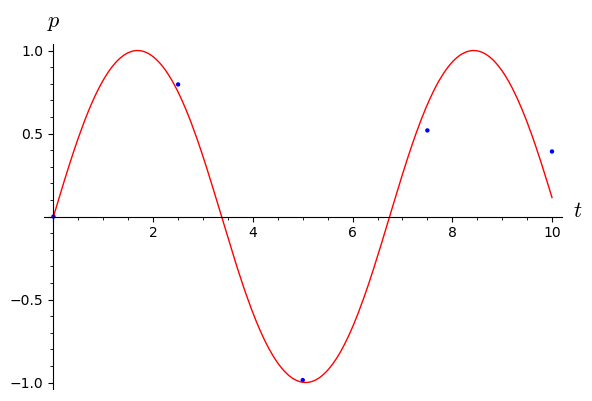

In [14]:
s=irk(pr, N=4, eps=10^-10, M=10^2, tableau=B[0])
s.plot(t,p)+plot(jacobi('sn',t, k^2),(t,0,10), color='red')

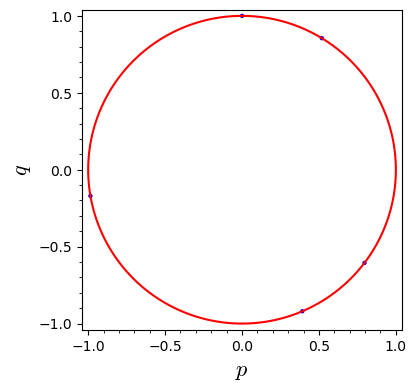

In [15]:
s.plot(p,q)+ implicit_plot(p^2+q^2-1,(p,-1,1),(q,-1,1), color='red')

In [16]:
s.list()[-1]

[10,
 0.391777003902870123933963825448283894040347234450903868883440599240664223312895346621664992,
 -0.920060204169397226395664766920856258657849917411059065592074624758946415132319749651489359,
 0.980626174873824348493431724520981040858709430328585847075891957105966183034210419223679653]

In [17]:
s.value(p,10)

0.391777003902870123933963825448283894040347234450903868883440599240664223312895346621664989

In [18]:
jacobi('sn',10.0, k^2)

0.114190123460750

## Оценка ошибки по методы Ричардсона

In [21]:
@parallel
def fu(n):
    return irk(pr, N=2^n, eps=10^-10, M=10^2, tableau=B[0])
L=fu([n for n in range(3,12)])
LL=list(L)

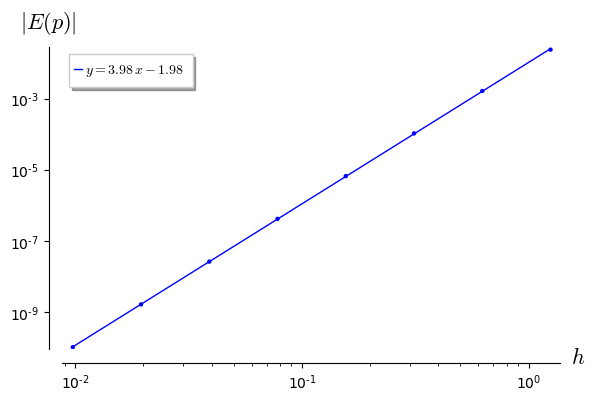

In [23]:
richardson_plot([LL[n][1] for n in range(len(LL))],p,10, nmax=10)

In [24]:
richardson(LL[5][1],LL[4][1],p,10)

[0.114190149518276331438876024085362214395694696109014579317971811871688833877521810553262793,
 2.60467206631511130084774837303508200085852375806110102007132349445148222053534497555458931e-8]

In [25]:
LL[5][1].value(p,10) - jacobi('sn',10.0, k^2)

2.60575259980467e-8

In [26]:
richardson(LL[5][1],LL[4][1],p^2+q^2-1,10)

[5.46898634284412340627628559001283291456654111254432229364350021257998342166812826921613246e-13,
 4.79606313703644207251763850808333727181931816276249594192062237511219072852366349442901484e-13]

## Выбор другой таблицы Бутчера

In [27]:
B=butcher_list(6,3,symplectic=True)
len(B)

6

In [99]:
B[0].latex(field=AA)

\begin{array}{c|ccc}
-\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{5}{36} & -\frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & -\sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & \frac{5}{36} & \sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} & \frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & -\frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & \frac{2}{9} \\
\hline
 & \frac{5}{18} & \frac{5}{18} & \frac{4}{9}
\end{array}


$$\begin{array}{c|ccc}
-\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{5}{36} & -\frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & -\sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & \frac{5}{36} & \sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} & \frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & -\frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & \frac{2}{9} \\
\hline
 & \frac{5}{18} & \frac{5}{18} & \frac{4}{9}
\end{array}$$

In [28]:
@parallel
def fu(n):
    return irk(pr, N=2^n, eps=10^-10, M=10^2, tableau=B[0])
L=fu([n for n in range(3,12)])
LL=list(L)

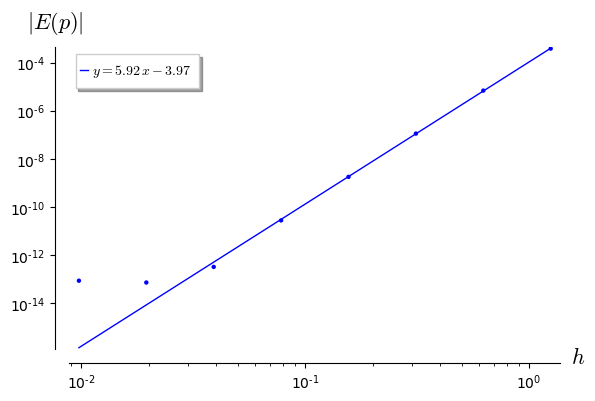

In [29]:
richardson_plot([LL[n][1] for n in range(len(LL))],p,10, nmax=4)

In [30]:
B=butcher_list(2,1,symplectic=True)
len(B)

1

In [31]:
B[0].latex(field=AA)

\begin{array}{c|c}
\frac{1}{2} & \frac{1}{2} \\
\hline
 & 1
\end{array}


$$\begin{array}{c|c}
\frac{1}{2} & \frac{1}{2} \\
\hline
 & 1
\end{array}$$

In [33]:
@parallel
def fu(n):
    return irk(pr, N=2^n, eps=10^-10, M=10^2, tableau=B[0])
L=fu([n for n in range(3,12)])
LL=list(L)

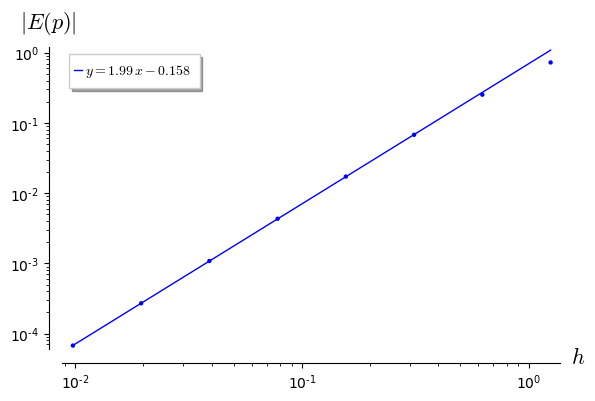

In [36]:
richardson_plot([LL[n][1] for n in range(len(LL))],p,10, nmin=2)